## Simple Option Pricing Example from Balaraman and Ballabio

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import QuantLib as ql
import datetime
import eikon as ek

ModuleNotFoundError: No module named 'QuantLib'

In [2]:
today_i = datetime.date.today()

In [241]:
today = ql.Date(today_i.day,today_i.month, today_i.year)
ql.Settings.instance().evaluationDate = today
print("Today's date:", today)

Today's date: October 3rd, 2020


In [242]:
option = ql.EuropeanOption(ql.PlainVanillaPayoff(ql.Option.Put, 35), ql.EuropeanExercise(ql.Date(26, ql.January, 2021)))
u = ql.SimpleQuote(40.40)
r = ql.SimpleQuote(0.01)
sigma = ql.SimpleQuote(0.52)

In [243]:
riskFreeCurve = ql.FlatForward(0, ql.TARGET(), ql.QuoteHandle(r), ql.Actual360())
volatility = ql.BlackConstantVol(0, ql.TARGET(), ql.QuoteHandle(sigma), ql.Actual360())
process = ql.BlackScholesProcess(ql.QuoteHandle(u), ql.YieldTermStructureHandle(riskFreeCurve),
ql.BlackVolTermStructureHandle(volatility))
engine = ql.AnalyticEuropeanEngine(process)
option.setPricingEngine(engine)
print(option.NPV())

2.1408279339784615


In [244]:
print(option.delta())
print(option.gamma())
print(option.vega())

-0.2581885330213955
0.02745943650744379
7.315325202710488


In [245]:
u.setValue(10.50)
print(option.NPV())

24.390333966273385


2.2141411941944504
-0.016644852025509183
October 3rd, 2020 October 4th, 2020


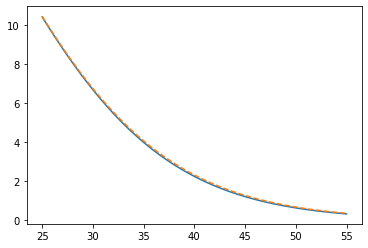

In [246]:
xs = np.linspace(25,55.0,400)
ys = []
for x in xs:
    u.setValue(x)
    ys.append(option.NPV())
plt.plot(xs,ys,label = "Spot")



u.setValue(40.40)
r.setValue(0.01)
sigma.setValue(0.53)
print(option.NPV())




print(option.thetaPerDay())



shift_d = today + 1
print(today,shift_d)
ql.Settings.instance().evaluationDate = shift_d


xs_s = xs
ys_1 = []
for x in xs:
    u.setValue(x)
    ys_1.append(option.NPV())

plt.plot(xs_s, ys_1, '--')
plt.show()

In [247]:

ql.Settings.instance().evaluationDate = today

In [248]:
ql.Settings.instance().evaluationDate = today+3
u.setValue(40.40)
P0 = option.NPV(); print(P0)
ql.Settings.instance().evaluationDate = today+4

P1 = option.NPV()
h = 1.0/365
Theta = (P1-P0) ; print(Theta*10)
ql.Settings.instance().evaluationDate = today

2.1972343880808136
-0.16968749160132912


In [249]:
ql.Date(26, ql.January, 2021) -today

115

In [250]:
print(option.thetaPerDay())
print(option.theta()/365)


-0.016644852025509183
-0.016644852025509183


In [251]:
sigma0 = sigma.value() ; h = 0.0001
sigma.setValue(sigma0+h) ; P_plus = option.NPV()
sigma.setValue(sigma0)
Vega = (P_plus - P0)*100 ; print(Vega)

1.7641522437166657


In [254]:
x=option.impliedVolatility(40.0,process)



RuntimeError: root not bracketed: f[0.0001,4] -> [-4.000000e+01,-1.495297e+01]

In [255]:

def getEuropeanOptionPrice(opt_type,u,s,expiry,sigma,r):
	if opt_type == "Call":
        opt_type = ql.Option.Call
    if opt_type =="Put":
        opt_type = ql.Option.Put

	return opt_type

In [259]:
x = getEuropeanOptionPrice("Put",1,2,3,4,5)

In [261]:
print(type(x))


<class 'int'>


In [5]:
import numpy as np
import QuantLib as ql
import datetime


def european_option(val,exp,str,vol,typ,und,r):

    opt_type = ql.Option.Put if typ=="Put" else ql.Option.Call
    ql.Settings.instance().evaluationDate = ql.Date(val.day,val.month, val.year)




    option = ql.EuropeanOption(ql.PlainVanillaPayoff(opt_type, str), ql.EuropeanExercise(ql.Date(exp.day,exp.month,exp.year)))
    u = ql.SimpleQuote(und)
    r = ql.SimpleQuote(r)
    sigma = ql.SimpleQuote(vol)


    riskFreeCurve = ql.FlatForward(0, ql.TARGET(), ql.QuoteHandle(r), ql.Actual360())
    volatility = ql.BlackConstantVol(0, ql.TARGET(), ql.QuoteHandle(sigma), ql.Actual360())
    process = ql.BlackScholesProcess(ql.QuoteHandle(u), ql.YieldTermStructureHandle(riskFreeCurve),
    ql.BlackVolTermStructureHandle(volatility))
    engine = ql.AnalyticEuropeanEngine(process)
    option.setPricingEngine(engine)
    output = {"Value Date": valuation_date,"Underlying":und, "Implied Vol": vol,'NPY': option.NPV(), 'delta':(option.delta()), 'gamma': (option.gamma()), 'vega': (option.vega()), 'theta': option.thetaPerDay()}

    return output

In [6]:
valuation_date = datetime.date(2020,10,20)
expiry_date = datetime.date(2021,6,18)
strike = 250
vol = 0.203
option_type = "Call"
underlying = 210



dict_1 = european_option(valuation_date,expiry_date,strike,vol,option_type,underlying,0.01)

In [7]:
(dict_1)

{'Value Date': datetime.date(2020, 10, 20),
 'Underlying': 210,
 'Implied Vol': 0.203,
 'NPY': 3.097021330281647,
 'delta': 0.17712514275365338,
 'gamma': 0.007447104021707361,
 'vega': 44.63099708161371,
 'theta': -0.019473607078995172}

In [8]:
valuation_date = datetime.date(2020,10,6)


In [9]:
import pandas as pd

datelist = pd.date_range(datetime.date.today(), periods=35)

In [10]:
output = pd.DataFrame(columns=[list(dict_1.keys())])
output

,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta


In [6]:
for d in datelist:

    dict_1 = european_option(d,expiry_date,strike,vol,option_type,underlying,0.01)
    v_list = (list(dict_1.values()))
    df_len = len(output)
    output.loc[df_len] = v_list

In [7]:
output

,Value Date,Underlying,Implied Vol,NPY,delta,gamma,vega,theta
0,2020-10-06,43,0.52,1.435131,-0.188400,0.022355,6.269084,-0.015050
1,2020-10-06,43,0.52,1.419853,-0.187646,0.022407,6.223737,-0.015086
2,2020-10-06,43,0.52,1.404539,-0.186881,0.022459,6.178124,-0.015123
3,2020-10-06,43,0.52,1.389187,-0.186105,0.022510,6.132238,-0.015160
4,2020-10-06,43,0.52,1.342909,-0.183708,0.022665,5.992915,-0.015270
5,2020-10-06,43,0.52,1.342909,-0.183708,0.022665,5.992915,-0.015270
6,2020-10-06,43,0.52,1.342909,-0.183708,0.022665,5.992915,-0.015270
7,2020-10-06,43,0.52,1.327408,-0.182885,0.022717,5.945904,-0.015307
8,2020-10-06,43,0.52,1.311869,-0.182050,0.022769,5.898601,-0.015344
9,2020-10-06,43,0.52,1.296294,-0.181203,0.022820,5.851001,-0.015380


In [8]:
output.to_csv('Output.csv')




<Figure size 432x288 with 0 Axes>

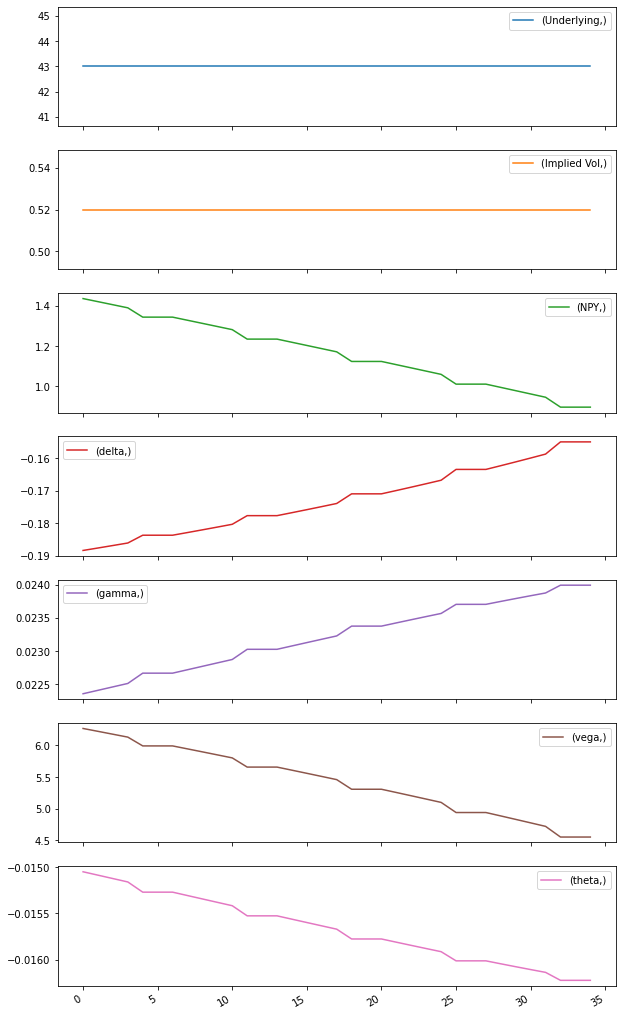

In [30]:
from matplotlib import pyplot as plt
plt.figure()
out = output.plot.line( subplots=True, figsize= (10,20))

plt.savefig("graph.png")
